# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("/Users/m.soren/Desktop/Ironhack/Labs/lab-linear-regression-correlation/data/absences.csv")

In [4]:
data.head()

,Unnamed: 0,EmployeeID,Age,Absences
0,0,1,27,15
1,1,2,61,6
2,2,3,37,10
3,3,4,23,18
4,4,5,46,9


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

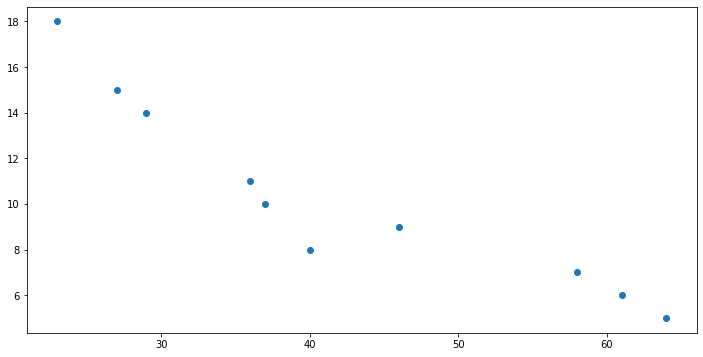

In [5]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(y=data["Absences"], x=data["Age"])


#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [13]:
x = np.array(data["Age"]) 
y = np.array(data["Absences"])

## $a = \bar{y} - \bar{x}\frac{(\bar{xy}-\bar{x}\bar{y})}{(\bar{x^{2}}-\bar{x}^{2})}$

## $b=\frac{(\bar{xy}-\bar{x}\bar{y})}{(\bar{x^{2}}-\bar{x}^{2})}$

In [14]:
def slope_reg(x,y):
    b = (np.mean(x*y) - (np.mean(x) * np.mean(y))) / (np.mean(np.power(x, 2)) - np.power(np.mean(x), 2))
    a = np.mean(y) - (np.mean(x) * b)
    return a,b

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [15]:
a,b = slope_reg(x,y)

print(f"The slope is: {b}")
print(f"The intercept is: {a}")

The slope is: -0.26810883370334093
The intercept is: 21.587381898910657


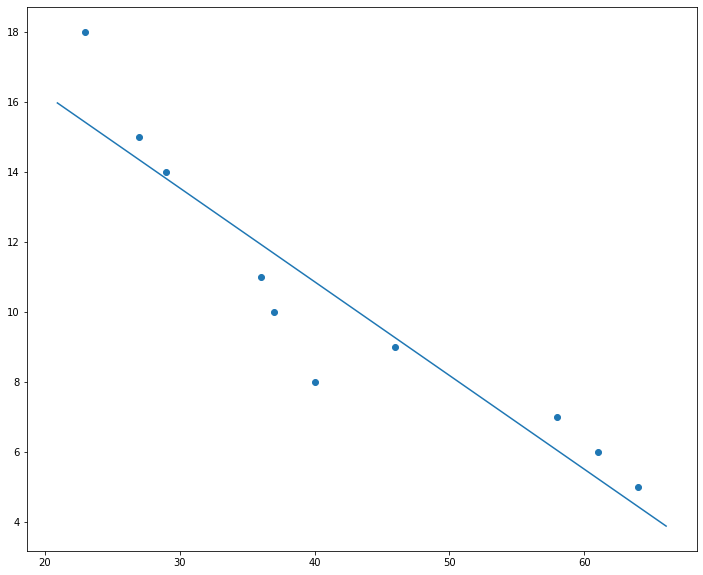

In [18]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals)
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(x,y)
abline(b,a)

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [20]:
def cov_corr(x,y):
    n = len(x)
    cov_xy = sum([(x[i] - np.mean(x))*(y[i] - np.mean(y)) for i in list(range(0,n))])/(n-1)
    stedv_x = np.std(x,ddof=1)
    stdev_y = np.std(y,ddof=1)
    corr_xy = cov_xy/(stedv_x*stdev_y) 
    return cov_xy, corr_xy


#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [21]:
c,d = cov_corr(x,y)

print(f"Correlation = {d}")
print(f"Covariance = {c}")

Correlation = -0.9325434092481012
Covariance = -57.699999999999996


In [60]:
# your code here


Correlation: -0.9325434092481012
Covariance: -57.699999999999996


In [61]:
# your comments here


#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

## it seems to be that there is a negative correlation with age and absenteeism. I'm not sure what the covariance that low means. We now need to think of a way that this correlation could be explained.

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [22]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [23]:
c,d = cov_corr(ironbeers_df["X"],ironbeers_df["Y"])

print(f"Correlation = {d}")
print(f"Covariance = {c}")

Correlation = 0.9770084209183943
Covariance = 12.0


Correlation: 0.9770084209183943
Covariance: 12.0


#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

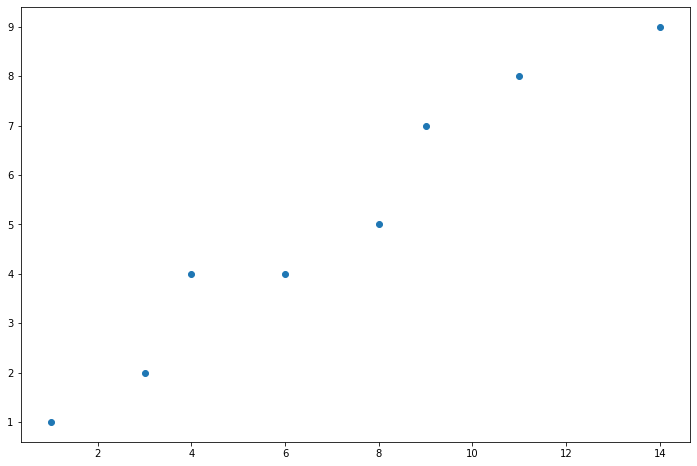

In [26]:
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(ironbeers_df["X"], ironbeers_df["Y"])


In [66]:
# your comments here


#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [27]:
d,f = slope_reg(ironbeers_df["X"], ironbeers_df["Y"])

print(f"The slope is: {f}")
print(f"The intercept is: {d}")

The slope is: 0.6363636363636364
The intercept is: 0.5454545454545459


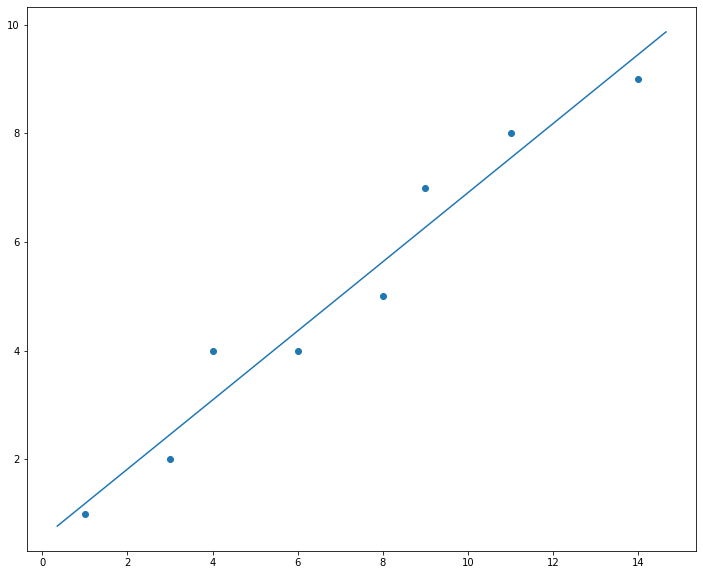

In [28]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals)
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(ironbeers_df["X"], ironbeers_df["Y"])
abline(f, d)

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

## There is a positive relationship between how many poeopel we have asked and how many have come. So we are not the reason to do that.

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

,X,Y,expected_Y
0,1,1,1.181818
1,3,2,2.454545
2,4,4,3.090909
3,6,4,4.363636
4,8,5,5.636364
5,9,7,6.272727
6,11,8,7.545455
7,14,9,9.454545


R2_score: 0.9545454545454548


#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

,X,Y,expected_Y,error
0,1,1,1.181818,-0.181818
1,3,2,2.454545,-0.454545
2,4,4,3.090909,0.909091
3,6,4,4.363636,-0.363636
4,8,5,5.636364,-0.636364
5,9,7,6.272727,0.727273
6,11,8,7.545455,0.454545
7,14,9,9.454545,-0.454545


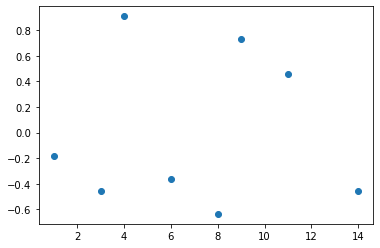

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# comment here

#### 4.- Remove the points with a high error (0.6 threshold) and recalculate the regression line.

In [49]:
# your code here 


,X,Y,expected_Y,error
0,1,1,1.181818,-0.181818
1,3,2,2.454545,-0.454545
2,6,4,4.363636,-0.363636
3,8,5,5.636364,-0.636364
4,11,8,7.545455,0.454545
5,14,9,9.454545,-0.454545


Plot before deleting higher error data points: 


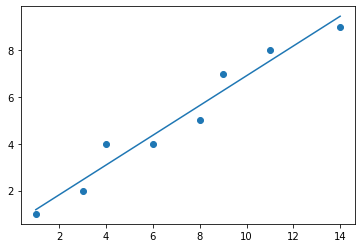

Plot after deleting higher error data points: 


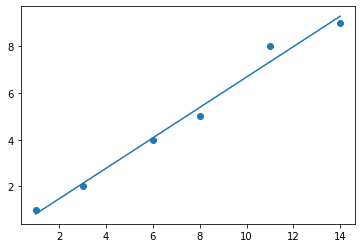

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here


Covariance and correlation before deleting higher error data points: 


(12.0, 0.9770084209183943)

Covariance and correlation after deleting higher error data points: 


(15.433333333333332, 0.9928560954470167)

In [87]:
# your comments here

